# 🛍️ Zudio Sales Analysis

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [62]:
df = pd.read_csv(r"C:\Users\Z-BLOCK\Downloads\archive (18).zip")

 # What are the seasonal sales trends for Zudio?

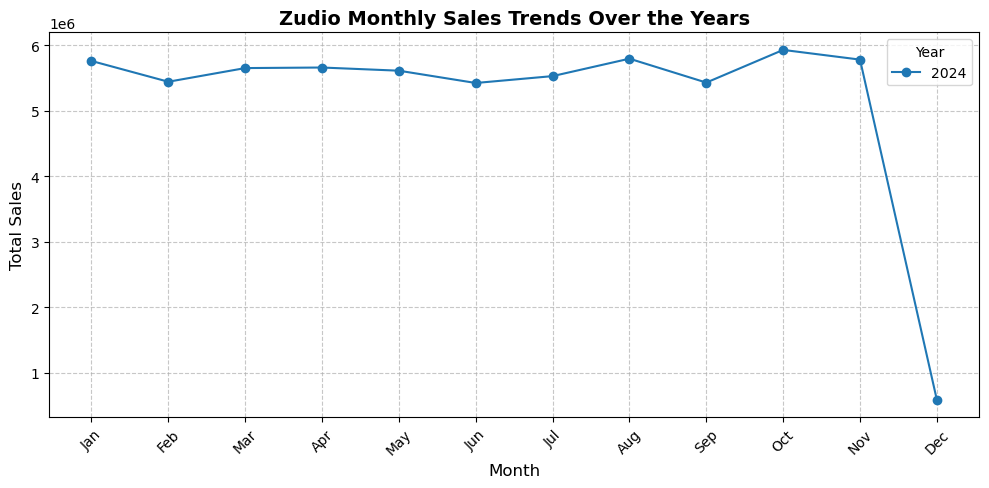

<Figure size 640x480 with 0 Axes>

In [64]:
df['Order Date'] = pd.to_datetime(df['Order Date'])  # Convert to datetime

# calculate Total Sales
df['Total Sales'] = df['Price'] * df['Quantity']

# Extract Year and Month
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

#  Aggregate Monthly Sales
monthly_sales = df.groupby(['Year', 'Month'])['Total Sales'].sum().reset_index()

# Pivot Table for Heatmap
sales_pivot = monthly_sales.pivot(index='Year', columns='Month', values='Total Sales')

# Month Labels
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Line Plot for Seasonal Sales Trends
plt.figure(figsize=(12, 5))
for year in monthly_sales['Year'].unique():
    yearly_data = monthly_sales[monthly_sales['Year'] == year]
    plt.plot(yearly_data['Month'], yearly_data['Total Sales'], marker='o', label=f"{year}")

plt.title("Zudio Monthly Sales Trends Over the Years", fontsize=14, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(ticks=np.arange(1, 13), labels=month_labels, rotation=45)
plt.legend(title="Year")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

plt.savefig("seasonal_sales.png") 


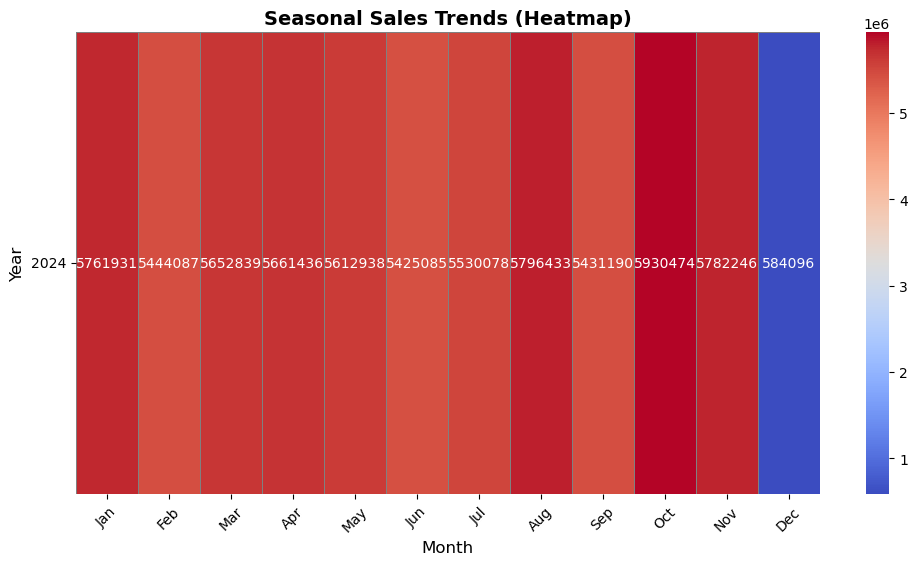

<Figure size 640x480 with 0 Axes>

In [66]:
# Heatmap for Seasonal Patterns
plt.figure(figsize=(12, 6))
sns.heatmap(sales_pivot, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5, linecolor="gray")

plt.title("Seasonal Sales Trends (Heatmap)", fontsize=14, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Year", fontsize=12)
plt.xticks(ticks=np.arange(12) + 0.5, labels=month_labels, rotation=45)
plt.yticks(rotation=0)

plt.show()

plt.savefig("seasonal_sales_heatmap.png") 

# How does festive season impact sales performance?

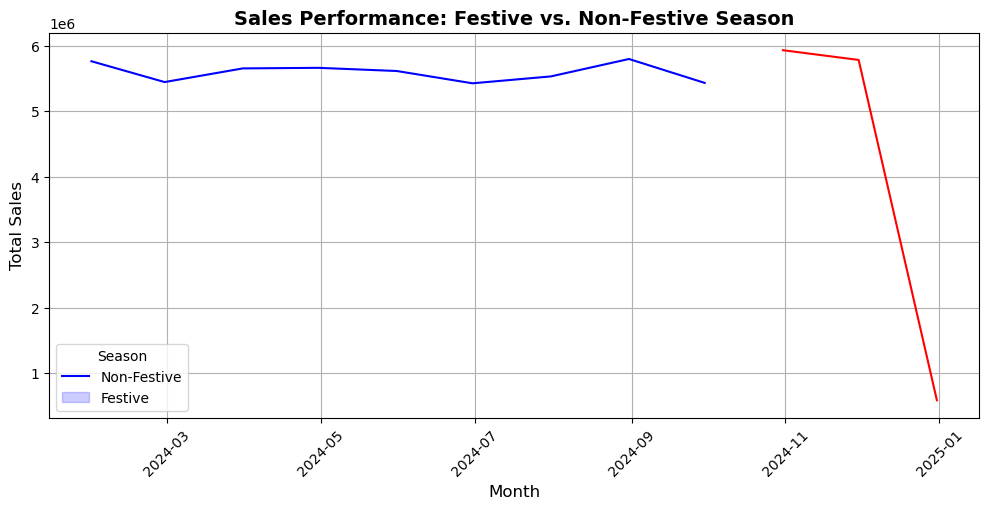

<Figure size 640x480 with 0 Axes>

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Order Date in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Calculate Total Sales
df['Total Sales'] = df['Price'] * df['Quantity']

# Festive Season Months (Diwali, Christmas, New Year, etc.)
festive_months = [10, 11, 12]  # October, November, December

#new column 'Festive Season' (Festive = 1, Non-Festive = 0)
df['Festive Season'] = df['Order Date'].dt.month.isin(festive_months).astype(int)

#Aggregate sales data monthly
df_monthly = df.groupby(['Festive Season', pd.Grouper(key='Order Date', freq='ME')])['Total Sales'].sum().reset_index()

# Plot Sales Trends for Festive vs. Non-Festive Seasons
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_monthly, x='Order Date', y='Total Sales', hue='Festive Season', palette=['blue', 'red'])

plt.title("Sales Performance: Festive vs. Non-Festive Season", fontsize=14, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.legend(title="Season", labels=["Non-Festive", "Festive"])
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

plt.savefig("festive.png") 


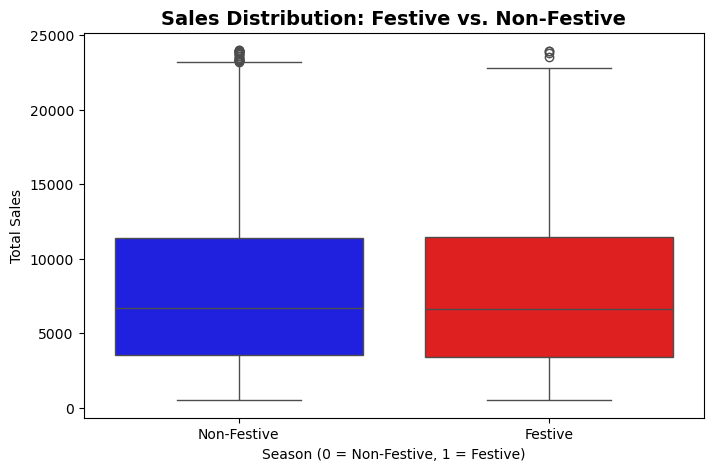

<Figure size 640x480 with 0 Axes>

In [70]:
# Boxplot Comparison
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Festive Season', y='Total Sales', hue='Festive Season', palette=['blue', 'red'], legend=False)

plt.title("Sales Distribution: Festive vs. Non-Festive", fontsize=14, fontweight='bold')
plt.xlabel("Season (0 = Non-Festive, 1 = Festive)")
plt.ylabel("Total Sales")
plt.xticks([0, 1], ["Non-Festive", "Festive"])

plt.show()

plt.savefig("festive_boxplot.png") 

# What is the effect of discounts and promotions on sales?

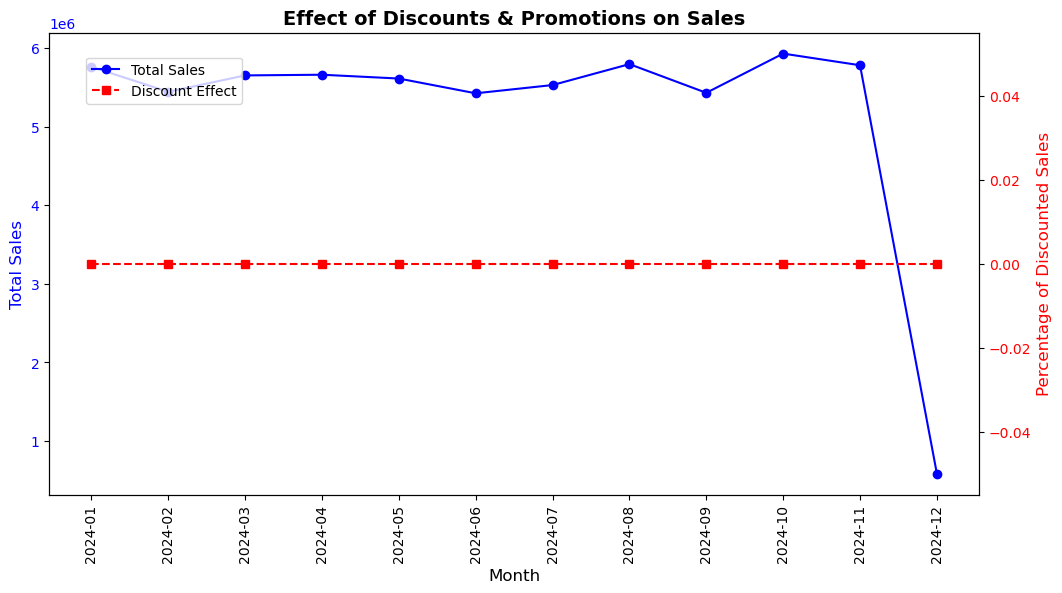

<Figure size 640x480 with 0 Axes>

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 'Order Date' in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Calculate Total Sales
df['Total Sales'] = df['Price'] * df['Quantity']

#  Calculate Profit Margin (to estimate discount effect)
df['Profit Margin'] = df['Sales Profit'] / df['Total Sales']

# Categorize Discounts/Promotion Based on Profit Margin
df['Discount Applied'] = df['Profit Margin'] < 0.1  # Assuming low margin means discount

# Group by Month and Calculate Avg. Sales & Profit Margin
df_monthly = df.groupby(df['Order Date'].dt.to_period('M')).agg({
    'Total Sales': 'sum',
    'Profit Margin': 'mean',
    'Discount Applied': 'mean'  # Percentage of discounted sales
}).reset_index()

# 'Order Date' back to string for plotting
df_monthly['Order Date'] = df_monthly['Order Date'].astype(str)

# 🔹 Plot Sales & Discounts Effect
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Total Sales
ax1.plot(df_monthly['Order Date'], df_monthly['Total Sales'], marker='o', color='b', label="Total Sales")
ax1.set_xlabel("Month", fontsize=12)
ax1.set_ylabel("Total Sales", color='b', fontsize=12)
ax1.tick_params(axis='y', labelcolor='b')

# Set Fixed Ticks for X-axis
ax1.set_xticks(range(len(df_monthly)))  # Set positions
ax1.set_xticklabels(df_monthly['Order Date'], rotation=90)  # Set labels

# Plot Discount Effect (on second axis)
ax2 = ax1.twinx()
ax2.plot(df_monthly['Order Date'], df_monthly['Discount Applied'], marker='s', color='r', linestyle='dashed', label="Discount Effect")
ax2.set_ylabel("Percentage of Discounted Sales", color='r', fontsize=12)
ax2.tick_params(axis='y', labelcolor='r')

plt.title("Effect of Discounts & Promotions on Sales", fontsize=14, fontweight='bold')
fig.legend(loc="upper left", bbox_to_anchor=(0.15, 0.85))

plt.show()

plt.savefig("discount.png") 

# Which products contribute most to revenue growth?

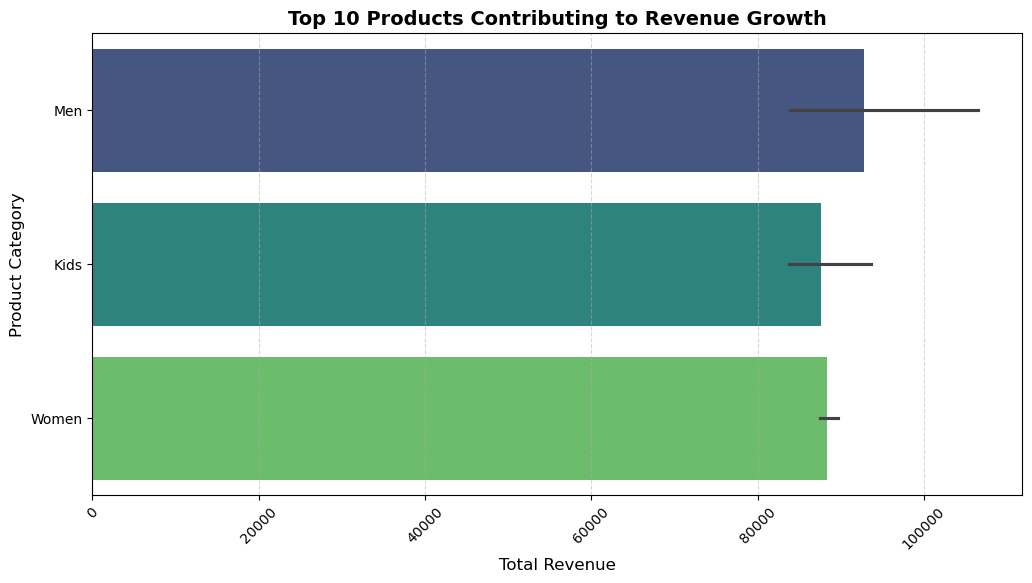

<Figure size 640x480 with 0 Axes>

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Total Sales
df['Total Sales'] = df['Price'] * df['Quantity']

# Aggregate Total Sales by Product ID & Category
product_sales = df.groupby(['Product ID', 'Category'])['Total Sales'].sum().reset_index()

# Sort products by Total Sales (Descending)
top_products = product_sales.sort_values(by='Total Sales', ascending=False).head(10)

# plot Top 10 Revenue-Contributing Products
plt.figure(figsize=(12, 6))
sns.barplot(x='Total Sales', y='Category', hue='Category', data=top_products, palette="viridis", legend=False)

plt.title("Top 10 Products Contributing to Revenue Growth", fontsize=14, fontweight='bold')
plt.xlabel("Total Revenue", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()

plt.savefig("revenue.png") 

# How do sales vary across different Zudio store locations?

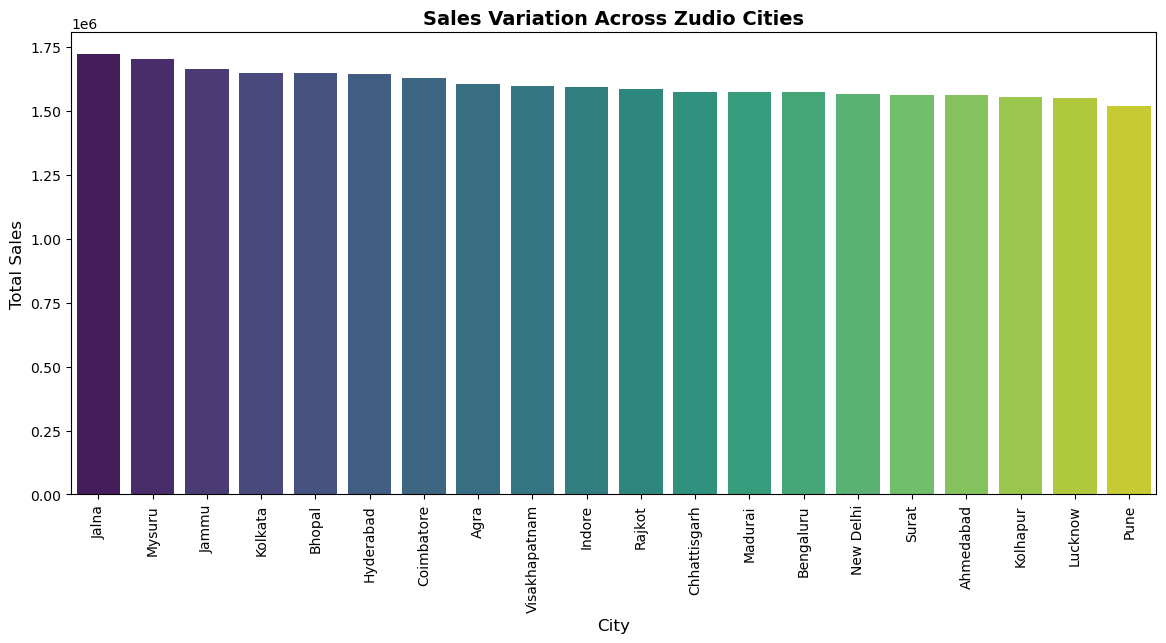

<Figure size 640x480 with 0 Axes>

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['Total Sales'] = df['Price'] * df['Quantity']

# Aggregate sales by city
city_sales = df.groupby('City', as_index=False)['Total Sales'].sum()

# Sort cities by sales (descending order)
city_sales = city_sales.sort_values(by='Total Sales', ascending=False)

# top 20 cities 
if city_sales.shape[0] > 20:
    city_sales = city_sales.head(20)

# bar chart 
plt.figure(figsize=(14, 6))
sns.barplot(data=city_sales, x='City', y='Total Sales', hue='City', palette='viridis', legend=False)

plt.title("Sales Variation Across Zudio Cities", fontsize=14, fontweight='bold')
plt.xlabel("City", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=90)  
plt.show()

plt.savefig("location.png") 

# What is the impact of customer footfall on sales performance?

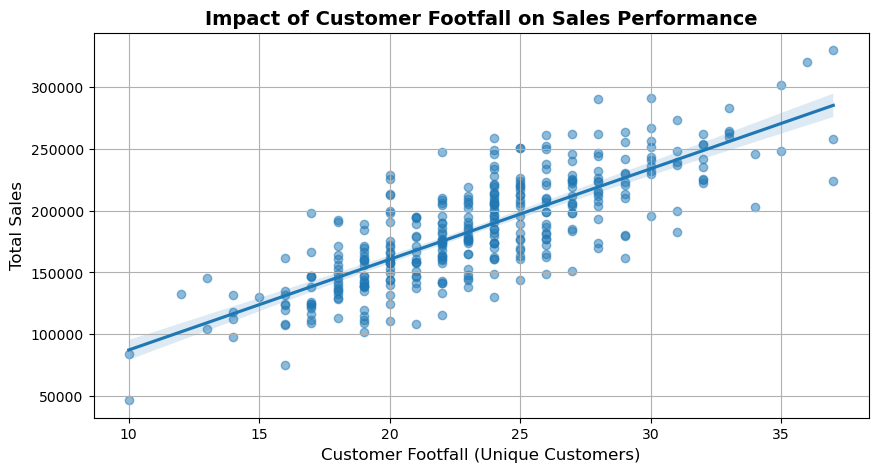

Correlation between Customer Footfall and Sales Performance: 0.79
P-value: 0.00000
 Strong relationship: Footfall significantly impacts sales.


<Figure size 640x480 with 0 Axes>

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df['Total Sales'] = df['Price'] * df['Quantity']

#  Calculate Customer Footfall (Unique Customers per Day)
footfall_sales = df.groupby(df['Order Date'].dt.date).agg(
    Footfall=('Customer ID', 'nunique'),  # Unique customers per day
    Total_Sales=('Total Sales', 'sum')  # Total sales per day
).reset_index()

# Scatter Plot: Footfall vs Sales Performance
plt.figure(figsize=(10, 5))
sns.regplot(x=footfall_sales['Footfall'], y=footfall_sales['Total_Sales'], scatter_kws={'alpha':0.5})
plt.title("Impact of Customer Footfall on Sales Performance", fontsize=14, fontweight='bold')
plt.xlabel("Customer Footfall (Unique Customers)", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.grid(True)
plt.show()

# Correlation Analysis
correlation, p_value = stats.pearsonr(footfall_sales['Footfall'], footfall_sales['Total_Sales'])

print(f"Correlation between Customer Footfall and Sales Performance: {correlation:.2f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print(" Strong relationship: Footfall significantly impacts sales.")
else:
    print(" Weak or No Relationship: Footfall may not strongly impact sales.")

plt.savefig("footfall.png") 

# Holt’s Linear Trend Model for Forecasting future Sales Profit

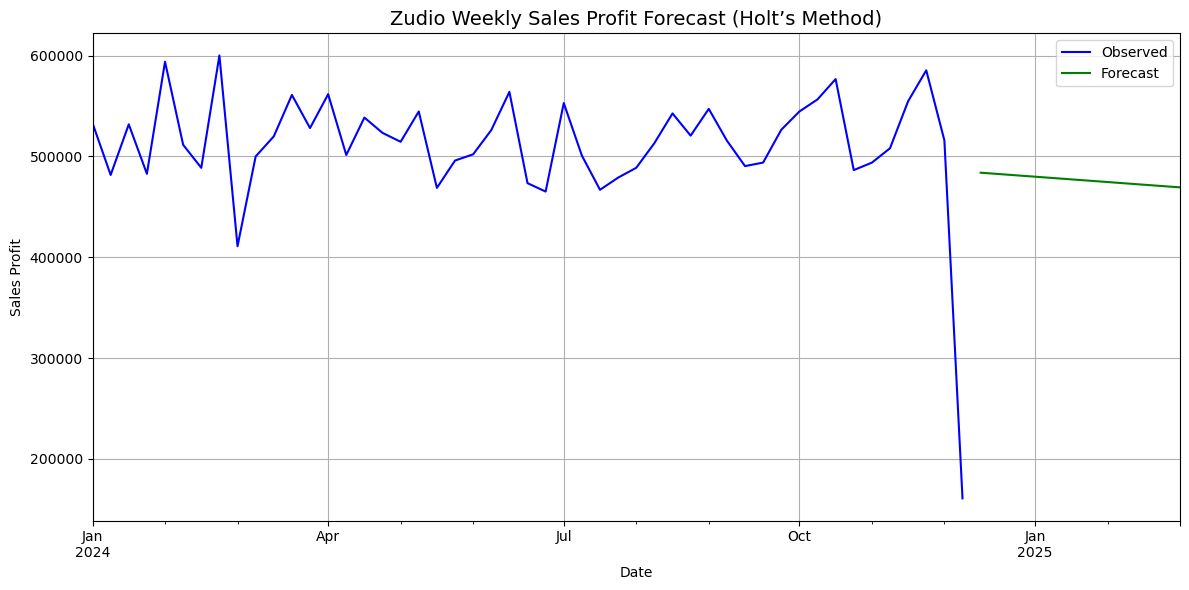

In [80]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

# Resample Weekly Sales Profit
weekly_sales = df.set_index('Order Date').resample('W')['Sales Profit'].sum()

# Drop NaNs if any
weekly_sales.dropna(inplace=True)

# Holt’s Linear Trend Model 
model = ExponentialSmoothing(weekly_sales, trend='add', seasonal=None)
fit = model.fit()

# Forecast Next 12 Weeks
forecast = fit.forecast(12)


plt.figure(figsize=(12,6))
weekly_sales.plot(label='Observed', color='blue')
forecast.plot(label='Forecast', color='green')
plt.title("Zudio Weekly Sales Profit Forecast (Holt’s Method)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Sales Profit")
plt.legend()
plt.grid(True)
plt.tight_layout()


plt.savefig("zudio_sales_forecast.png", dpi=300)
plt.show()
